In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)

In [4]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,classI_cat,classII_cat
TCGA-02-0003,0.169941,0.494106,GBM,50.0,WHITE,0.0,1.0,1.0,other,high
TCGA-02-0033,0.184676,0.487230,GBM,54.0,WHITE,0.0,2.0,2.0,high,high
TCGA-02-0047,0.120825,0.472495,GBM,78.0,WHITE,2.0,1.0,3.0,low,high
TCGA-02-0055,0.152259,0.496071,GBM,62.0,WHITE,0.0,2.0,2.0,low,high
TCGA-02-2466,0.181729,0.414538,GBM,61.0,WHITE,0.0,1.0,1.0,other,low


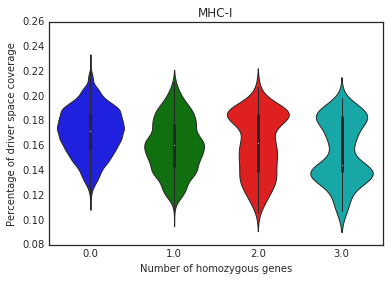

In [8]:
sns.violinplot(x='homozygous_classI', y='classI', data=df)
plt.xlabel('Number of homozygous genes')
plt.ylabel('Percentage of driver space coverage')
plt.title('MHC-I')

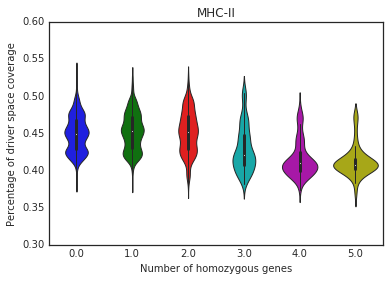

In [9]:
sns.violinplot(x='homozygous_classII', y='classII', data=df)
plt.xlabel('Number of homozygous genes')
plt.ylabel('Percentage of driver space coverage')
plt.title('MHC-II')

### Label patients with # of homozygous genes (MHC-I and MHC-II separate) 

In [3]:
classI_types = pd.read_csv('/cellar/users/ramarty/Data/hla/hla_typing/sample_and_types.with_homomzygous.csv', index_col=0)
classII_types = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/hla_types.tcga.csv', index_col=0)

In [5]:
len(classII_types)

8333

In [6]:
def homozygous(x):
    if x[0].strip() == x[1].strip():
        return True
    else:
        return False
classII_types['homozygous_DPA'] = classII_types[['DPA1_allele1', 'DPA1_allele2']].apply(homozygous, axis=1)
classII_types['homozygous_DPB'] = classII_types[['DPB1_allele1', 'DPB1_allele2']].apply(homozygous, axis=1)
classII_types['homozygous_DQA'] = classII_types[['DQA1_allele1', 'DQA1_allele2']].apply(homozygous, axis=1)
classII_types['homozygous_DQB'] = classII_types[['DQB1_allele1', 'DQB1_allele2']].apply(homozygous, axis=1)
classII_types['homozygous_DRB'] = classII_types[['DRB1_allele1', 'DRB1_allele2']].apply(homozygous, axis=1)

Reduce to same patients

In [7]:
classI_samples = list(classI_types.Sample)
classII_samples = list(classII_types.index)
print len(classI_samples), len(classII_samples)

9839 8333


In [8]:
overlapping_samples = [x for x in classI_samples if x in classII_samples]
print len(overlapping_samples)

8225


In [9]:
classI_types = classI_types[classI_types.Sample.isin(overlapping_samples)]
classII_types = classII_types.ix[overlapping_samples]
classII_types['Sample'] = classII_types.index

In [10]:
all_types = pd.merge(classI_types, classII_types, on=['Sample'])

In [11]:
all_types.head()

,A1,A2,B1,B2,C1,C2,Sample,homozygous_A,homozygous_B,homozygous_C,...,DQA1_allele2,DQB1_allele1,DQB1_allele2,DRB1_allele1,DRB1_allele2,homozygous_DPA,homozygous_DPB,homozygous_DQA,homozygous_DQB,homozygous_DRB
0,A*01:01,A*02:01,B*07:02,B*35:03,C*04:01,C*07:02,TCGA-P5-A780,False,False,False,...,DQA10301,DQB10602,DQB10302,DRB1_1501,DRB1_0403,False,False,False,False,False
1,A*02:01,A*24:02,B*15:01,B*57:01,C*03:03,C*07:01,TCGA-55-A494,False,False,False,...,DQA10103,DQB10603,DQB10303,DRB1_1301,DRB1_0701,False,False,False,False,False
2,A*02:01,A*02:01,B*08:01,B*57:01,C*06:02,C*07:01,TCGA-BR-8382,True,False,False,...,DQA10501,DQB10303,DQB10201,DRB1_0301,DRB1_0701,True,True,False,False,False
3,A*02:01,A*02:01,B*07:04,B*52:01,C*07:02,C*12:02,TCGA-Z2-AA3S,True,False,False,...,DQA10103,DQB10602,DQB10601,DRB1_1501,DRB1_1502,True,True,False,False,False
4,A*02:01,A*11:01,B*35:03,B*40:01,C*03:04,C*12:03,TCGA-BR-6564,False,False,False,...,DQA10301,DQB10201,DQB10302,DRB1_0301,DRB1_0404,True,False,False,False,False


Overview of homozygosity

In [12]:
total_samples = float(len(all_types))
for x in ['homozygous_A', 'homozygous_B', 'homozygous_C', 'homozygous_DPA', 'homozygous_DPB',
          'homozygous_DQA', 'homozygous_DQB', 'homozygous_DRB']:
    print x, len(all_types[all_types[x]])/total_samples

homozygous_A 0.156960486322
homozygous_B 0.1073556231
homozygous_C 0.112583586626
homozygous_DPA 0.65896656535
homozygous_DPB 0.221398176292
homozygous_DQA 0.103951367781
homozygous_DQB 0.129118541033
homozygous_DRB 0.0865653495441


In [13]:
all_types['homozygous_classI'] = all_types[['homozygous_A', 'homozygous_B', 'homozygous_C']].sum(axis=1)
all_types['homozygous_classII'] = all_types[['homozygous_DPA', 'homozygous_DPB',
          'homozygous_DQA', 'homozygous_DQB', 'homozygous_DRB']].sum(axis=1)
all_types['homozygous_total'] = all_types[['homozygous_classI', 'homozygous_classII']].sum(axis=1)

In [14]:
all_types.index = all_types.Sample

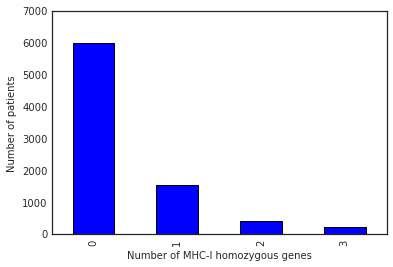

In [15]:
all_types.homozygous_classI.value_counts().plot(kind='bar')
plt.xlabel('Number of MHC-I homozygous genes')
plt.ylabel('Number of patients')

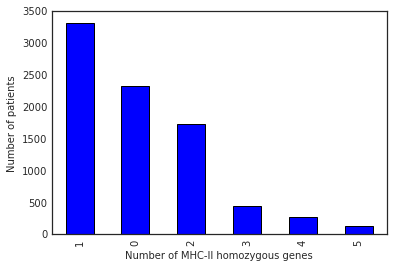

In [16]:
all_types.homozygous_classII.value_counts().plot(kind='bar')
plt.xlabel('Number of MHC-II homozygous genes')
plt.ylabel('Number of patients')

In [16]:
all_types.homozygous_total.value_counts()

1    2839
2    1995
0    1836
3     808
4     361
5     184
6     102
7      59
8      41
Name: homozygous_total, dtype: int64

In [21]:
all_types[['homozygous_classI', 'homozygous_classII', 'homozygous_total']].to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/homozygous_counts.csv')

### Distribution of PHBR scores

In [17]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv',
                     index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv',
                     index_col=0)

In [18]:
# reduce down to patients with PHBRs
all_types = all_types[all_types.Sample.isin(classI.index)]
len(all_types)

7085

Class I

In [19]:
# fractional coverage
fractional_coverageI = {}
for homozygous_count in [0, 1, 2, 3]:
    fractional_coverageI[homozygous_count] = list(sum(classI.ix[all_types[all_types.homozygous_classI == homozygous_count].Sample] < 1, axis=1) / 1018)

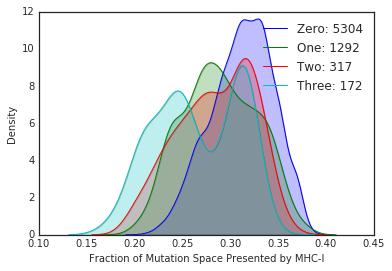

In [20]:
sns.kdeplot(fractional_coverageI[0], shade=True, label='Zero: {0}'.format(len(fractional_coverageI[0])))
sns.kdeplot(fractional_coverageI[1], shade=True, label='One: {0}'.format(len(fractional_coverageI[1])))
sns.kdeplot(fractional_coverageI[2], shade=True, label='Two: {0}'.format(len(fractional_coverageI[2])))
sns.kdeplot(fractional_coverageI[3], shade=True, label='Three: {0}'.format(len(fractional_coverageI[3])))
plt.legend()
#plt.ylim(0, 1.8)
#plt.xlim(0.5, 5)
plt.ylabel('Density')
plt.xlabel('Fraction of Mutation Space Presented by MHC-I')

In [21]:
# classII
fractional_coverageII = {}
for homozygous_count in [0, 1, 2, 3, 4, 5]:
    fractional_coverageII[homozygous_count] = list(sum(classII.ix[all_types[all_types.homozygous_classII == homozygous_count].Sample] < 15, axis=1) / 1018)

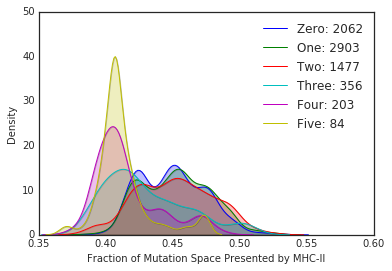

In [22]:
sns.kdeplot(fractional_coverageII[0], shade=True, label='Zero: {0}'.format(len(fractional_coverageII[0])))
sns.kdeplot(fractional_coverageII[1], shade=True, label='One: {0}'.format(len(fractional_coverageII[1])))
sns.kdeplot(fractional_coverageII[2], shade=True, label='Two: {0}'.format(len(fractional_coverageII[2])))
sns.kdeplot(fractional_coverageII[3], shade=True, label='Three: {0}'.format(len(fractional_coverageII[3])))
sns.kdeplot(fractional_coverageII[4], shade=True, label='Four: {0}'.format(len(fractional_coverageII[4])))
sns.kdeplot(fractional_coverageII[5], shade=True, label='Five: {0}'.format(len(fractional_coverageII[5])))

plt.legend()
plt.ylim(0, 50)
#plt.xlim(0.5, 5)
plt.ylabel('Density')
plt.xlabel('Fraction of Mutation Space Presented by MHC-II')

## Clinical phenotypes

In [23]:
patient_tissues = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/tissue_type/patient_tissues.csv', index_col=0)

In [24]:
homozygous_countI = {}
for homozygous_count in [0, 1, 2, 3]:
    homozygous_countI[homozygous_count] = list(all_types[all_types.homozygous_classI == homozygous_count].Sample)

In [25]:
homozygous_countII = {}
for homozygous_count in [0, 1, 2, 3, 4, 5]:
    homozygous_countII[homozygous_count] = list(all_types[all_types.homozygous_classII == homozygous_count].Sample)

In [26]:
homozygous_count_total = {}
for homozygous_count in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
    homozygous_count_total[homozygous_count] = list(all_types[all_types.homozygous_total == homozygous_count].Sample)

Somatic mutations in driver space

In [27]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv',
                     index_col=0)

In [28]:
driver_counts = pd.DataFrame(patient_mutations.sum(axis=1))
driver_counts.columns = ['number_of_drivers']

0 0.936463046757
1 0.958978328173
2 0.82334384858
3 0.883720930233


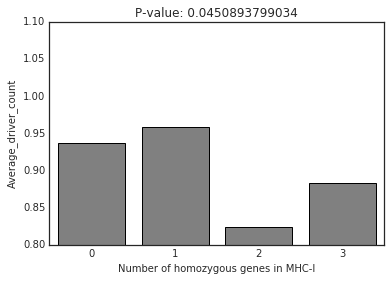

In [29]:
averages = []
for homozygous_count in [0, 1, 2, 3]:
    print homozygous_count, np.mean(driver_counts.ix[homozygous_countI[homozygous_count]].number_of_drivers)
    averages.append(np.mean(driver_counts.ix[homozygous_countI[homozygous_count]].number_of_drivers))

# Make bar chart
tmp_df = pd.DataFrame({'Homozygous_count': [0, 1, 2, 3],
                       'Average_driver_count': averages})
sns.barplot(x='Homozygous_count', y='Average_driver_count', data=tmp_df, color='grey')
plt.ylim(0.8, 1.1)
stat, P = sp.mannwhitneyu(driver_counts.ix[homozygous_countI[0]+homozygous_countI[1]].number_of_drivers,
                driver_counts.ix[homozygous_countI[2]+homozygous_countI[3]].number_of_drivers)
plt.title('P-value: {0}'.format(P))
plt.xlabel('Number of homozygous genes in MHC-I')

0 0.914161008729
1 0.93213916638
2 0.930264048747
3 1.0308988764
4 1.01477832512
5 0.964285714286


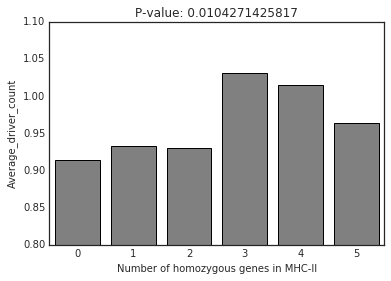

In [30]:
averages = []
for homozygous_count in [0, 1, 2, 3, 4, 5]:
    print homozygous_count, np.mean(driver_counts.ix[homozygous_countII[homozygous_count]].number_of_drivers)
    averages.append(np.mean(driver_counts.ix[homozygous_countII[homozygous_count]].number_of_drivers))
# Make bar chart
tmp_df = pd.DataFrame({'Homozygous_count': [0, 1, 2, 3, 4, 5],
                       'Average_driver_count': averages})
sns.barplot(x='Homozygous_count', y='Average_driver_count', data=tmp_df, color='grey')
plt.ylim(0.8, 1.1)
stat, P = sp.mannwhitneyu(driver_counts.ix[homozygous_countII[0]+homozygous_countII[1]+homozygous_countII[2]].number_of_drivers,
                driver_counts.ix[homozygous_countII[3]+homozygous_countII[4]+homozygous_countII[5]].number_of_drivers)
plt.title('P-value: {0}'.format(P))
plt.xlabel('Number of homozygous genes in MHC-II')

In [31]:
sp.mannwhitneyu(driver_counts.ix[homozygous_countII[0]+homozygous_countII[1]+homozygous_countII[2]].number_of_drivers,
                driver_counts.ix[homozygous_countII[3]+homozygous_countII[4]+homozygous_countII[5]].number_of_drivers)

MannwhitneyuResult(statistic=1964278.5, pvalue=0.010427142581656026)

In [32]:
for homozygous_count in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
    print homozygous_count, np.mean(driver_counts.ix[homozygous_count_total[homozygous_count]].number_of_drivers)

0 0.890042761148
1 0.968316831683
2 0.902552204176
3 0.964560862866
4 1.07194244604
5 0.844444444444
6 0.884615384615
7 0.875
8 1.09090909091


Age at diagnosis

In [33]:
age = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/age_at_diagnosis.csv', index_col=0)

In [34]:
age = age.ix[classI.index].dropna()

GBM 365
-0.159636298507 0.0377498066587


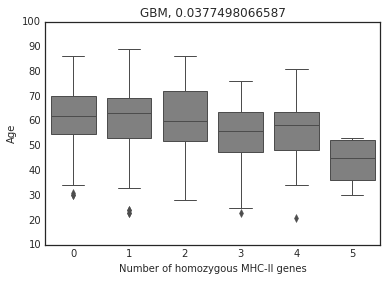

OV 188
LUAD 463
LUSC 386
PRAD 456
BLCA 380
PAAD 161
KIRP 247
LIHC 336
BRCA 239
COAD 308
STAD 382
SKCM 421
KIRC 269
THCA 451
HNSC 473
LGG 463
17


In [54]:
# correlation
correction = 0
for tissue in patient_tissues.Tissue.unique():
    patients_with_tissue = [x for x in list(patient_tissues[patient_tissues.Tissue == tissue].Sample) if x in list(age.index)]
    if len(patients_with_tissue) > 100:
        correction += 1
        print tissue, len(patients_with_tissue)
        Rho, P = sp.pearsonr(age.ix[patients_with_tissue].age, all_types[all_types.Sample.isin(patients_with_tissue)].homozygous_classII)
        if P*17 < 0.05:
            print Rho, P*17
            tmp_df = pd.DataFrame({'Patient': patients_with_tissue,
                       'Age': list(age.ix[patients_with_tissue].age),
                       'Homozygous_genes': all_types[all_types.Sample.isin(patients_with_tissue)].homozygous_classII})
            sns.boxplot(x='Homozygous_genes', y='Age', data=tmp_df, color='grey')
            plt.title(tissue + ', ' + str(P*17))
            plt.xlabel('Number of homozygous MHC-II genes')
            plt.ylim(10, 100)
            plt.show()
            plt.clf()
print correction

In [282]:
for tissue in patient_tissues.Tissue.unique():
    patients_with_tissue = [x for x in list(patient_tissues[patient_tissues.Tissue == tissue].Sample) if x in list(age.index)]
    if len(patients_with_tissue) > 50:
        print tissue, len(patients_with_tissue)
        Rho, P = sp.pearsonr(age.ix[patients_with_tissue].age, all_types[all_types.Sample.isin(patients_with_tissue)].homozygous_classI)
        if P*17 < 0.05:
            print Rho, P*17
            tmp_df = pd.DataFrame({'Patient': patients_with_tissue,
                       'Age': list(age.ix[patients_with_tissue].age),
                       'Homozygous_genes': all_types[all_types.Sample.isin(patients_with_tissue)].homozygous_classII})
            sns.boxplot(x='Homozygous_genes', y='Age', data=tmp_df, color='grey')
            plt.title(tissue)
            plt.xlabel('Number of homozygous MHC-I genes')
            plt.show()
            plt.clf()

GBM 365
OV 188
LUAD 463
LUSC 386
PRAD 456
UCEC 79
BLCA 380
PAAD 161
KIRP 247
LIHC 336
BRCA 239
COAD 308
STAD 382
SKCM 421
KIRC 269
THCA 451
HNSC 473
READ 94
LGG 463
KICH 59


Disease phenotypes

In [46]:
all_patients = list(classI.index)
print len(all_patients)

7085


In [47]:
# for each tissue type, look for enrichment for homozygous individuals
for tissue in patient_tissues.Tissue.unique():
    patients_with_tissue = [x for x in list(patient_tissues[patient_tissues.Tissue == tissue].Sample)]
    if len(patients_with_tissue) > 100:
        patients_not_tissue = [x for x in all_patients if x not in patients_with_tissue]
        patients_with_homozygous = homozygous_countII[3]+homozygous_countII[4]+homozygous_countII[5] # 
        patients_with_heterozyous = [x for x in all_patients if x not in patients_with_homozygous]
        #                  patients w/ tissue, patients w/o tissue
        # homozygous pat
        # heterozygous pat
        
        OR, P = sp.fisher_exact([[len([x for x in patients_with_homozygous if x in patients_with_tissue]),
                                        len([x for x in patients_with_homozygous if x not in patients_with_tissue])],
                                       [len([x for x in patients_with_heterozyous if x in patients_with_tissue]),
                                        len([x for x in patients_with_heterozyous if x not in patients_with_tissue])]])
        if P*17 < 0.05:
            print tissue, len(patients_with_tissue), OR, P*17, len([x for x in patients_with_homozygous if x in patients_with_tissue])

COAD 461 1.71221217753 0.0383428112102 44
HNSC 528 0.541240464632 0.0355125268902 25


In [48]:
for tissue in patient_tissues.Tissue.unique():
    patients_with_tissue = [x for x in list(patient_tissues[patient_tissues.Tissue == tissue].Sample)]
    if len(patients_with_tissue) > 100:
        patients_not_tissue = [x for x in all_patients if x not in patients_with_tissue]
        patients_with_homozygous = homozygous_countI[2]+homozygous_countI[3]
        patients_with_heterozyous = [x for x in all_patients if x not in patients_with_homozygous]
        #                  patients w/ tissue, patients w/o tissue
        # homozygous pat
        # heterozygous pat
        
        OR, P = sp.fisher_exact([[len([x for x in patients_with_homozygous if x in patients_with_tissue]),
                                        len([x for x in patients_with_homozygous if x not in patients_with_tissue])],
                                       [len([x for x in patients_with_heterozyous if x in patients_with_tissue]),
                                        len([x for x in patients_with_heterozyous if x not in patients_with_tissue])]])
        if P*17 < 0.05:
            print tissue, len(patients_with_tissue), OR, P*17

KIRC 537 1.8787727705 0.0347144418717


In [49]:
for tissue in patient_tissues.Tissue.unique():
    patients_with_tissue = [x for x in list(patient_tissues[patient_tissues.Tissue == tissue].Sample)]
    if len(patients_with_tissue) > 100:
        patients_not_tissue = [x for x in all_patients if x not in patients_with_tissue]
        patients_with_homozygous = homozygous_count_total[5]+homozygous_count_total[6]+homozygous_count_total[7]+homozygous_count_total[8]
        patients_with_heterozyous = [x for x in all_patients if x not in patients_with_homozygous]
        #                  patients w/ tissue, patients w/o tissue
        # homozygous pat
        # heterozygous pat
        
        OR, P = sp.fisher_exact([[len([x for x in patients_with_homozygous if x in patients_with_tissue]),
                                        len([x for x in patients_with_homozygous if x not in patients_with_tissue])],
                                       [len([x for x in patients_with_heterozyous if x in patients_with_tissue]),
                                        len([x for x in patients_with_heterozyous if x not in patients_with_tissue])]])
        if P*17 < 0.05:
            print tissue, len(patients_with_tissue), OR, P